In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
#importing libraries
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import os

In [5]:
matches = pd.read_csv("WorldCupMatches.csv")
players = pd.read_csv("WorldCupPlayers.csv")
cups = pd.read_csv("WorldCups.csv")
display("MATCHES-DATA")
display(matches.head())
display("PLAYERS-DATA")
display(players.head())
display("WORLD CUP - DATA")
display(cups.head())

'MATCHES-DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


'PLAYERS-DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


'WORLD CUP - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


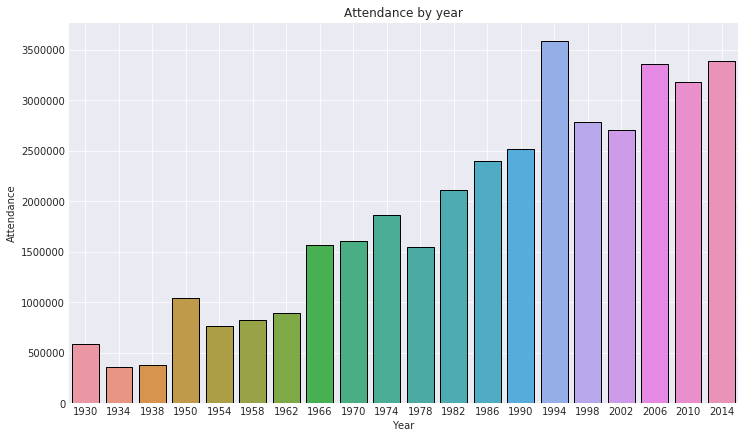

In [8]:
matches.isnull().sum()
sns.set_style("darkgrid")

# removing duplicate rows for match id column
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#removing null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendance by year")
plt.show()

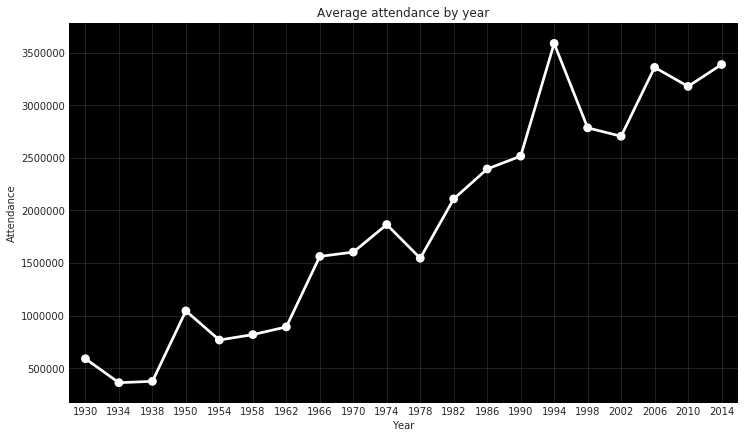

In [13]:
att1 = matches.groupby("Year")["Attendance"].sum().reset_index()
att1["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendance by year")
plt.show()

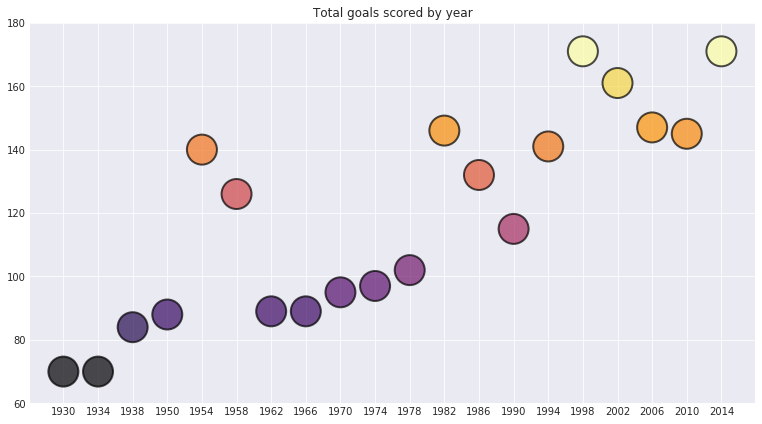

In [14]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,c=cups["GoalsScored"],cmap="inferno",s=900,alpha=.7,linewidth=2,edgecolor="k")

plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year')
plt.show()

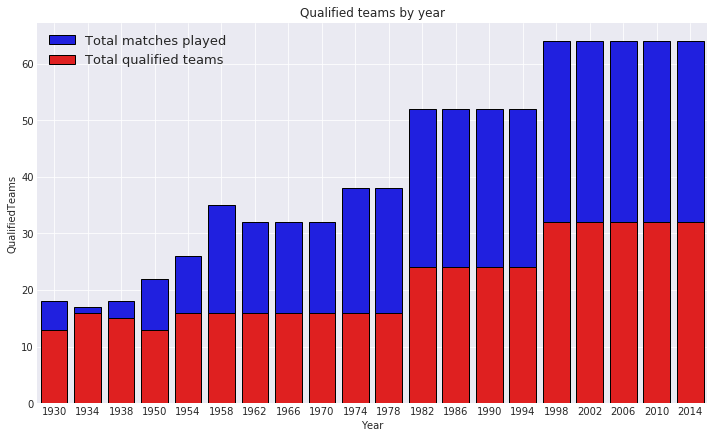

In [16]:
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year")
plt.grid(True)
plt.show()

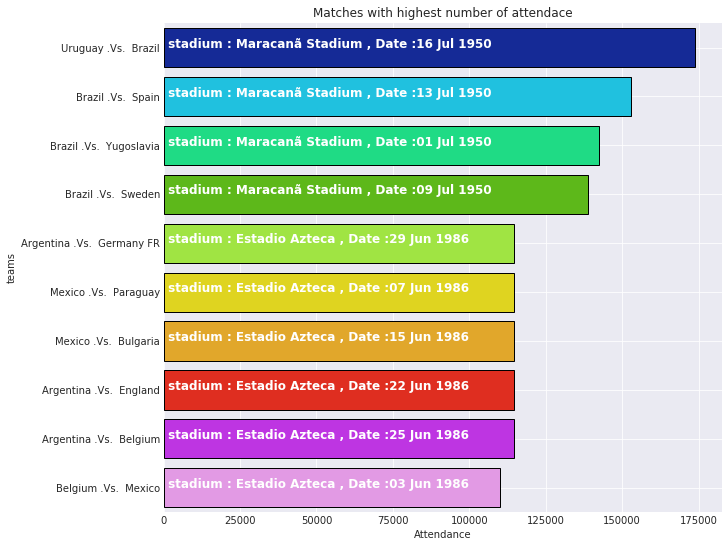

In [17]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace")
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

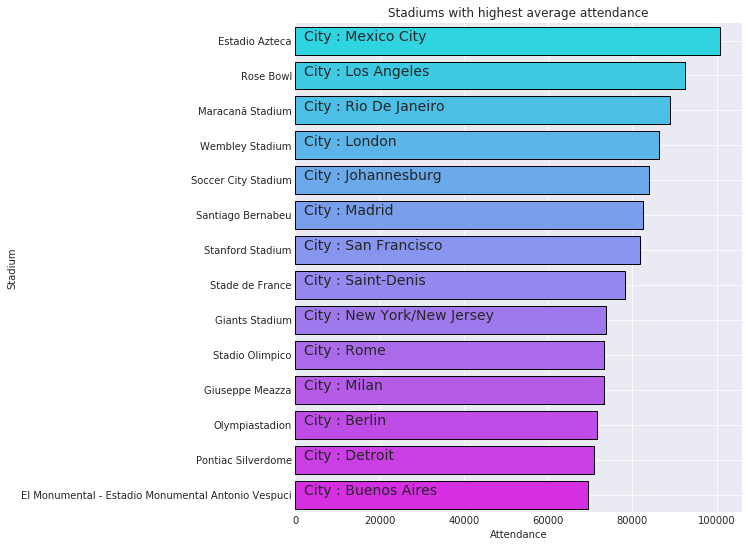

In [18]:
matches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance")
plt.show()

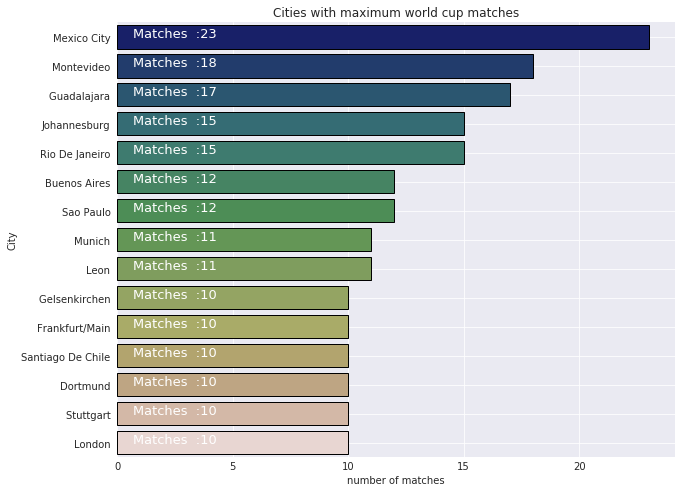

In [19]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="gist_earth",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches")

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

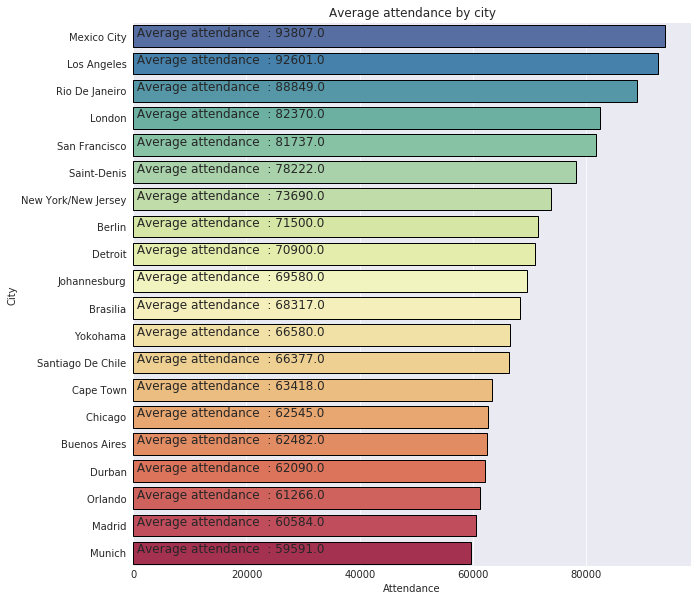

In [20]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)

plt.title("Average attendance by city")
plt.show()

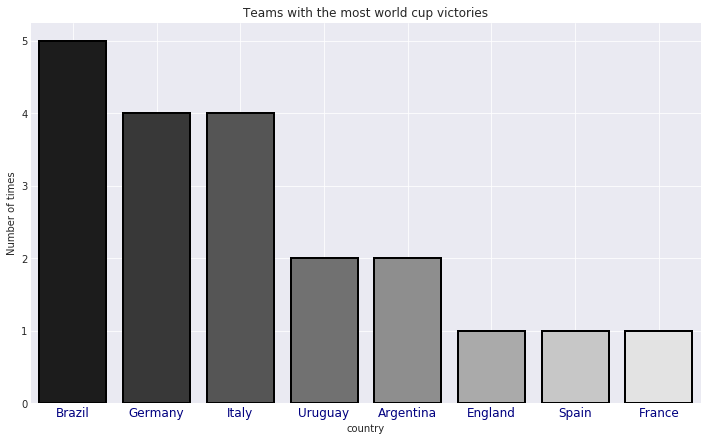

In [21]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
cou = cups["Winner"].value_counts().reset_index()

plt.figure(figsize=(12,7))
sns.barplot("index","Winner",data=cou,palette="binary_r",
            linewidth=2,edgecolor="k"*len(cou))
plt.grid(True)
plt.ylabel("Number of times")
plt.xlabel("country")
plt.title("Teams with the most world cup victories")
plt.xticks(color="navy",fontsize=12)
plt.show()

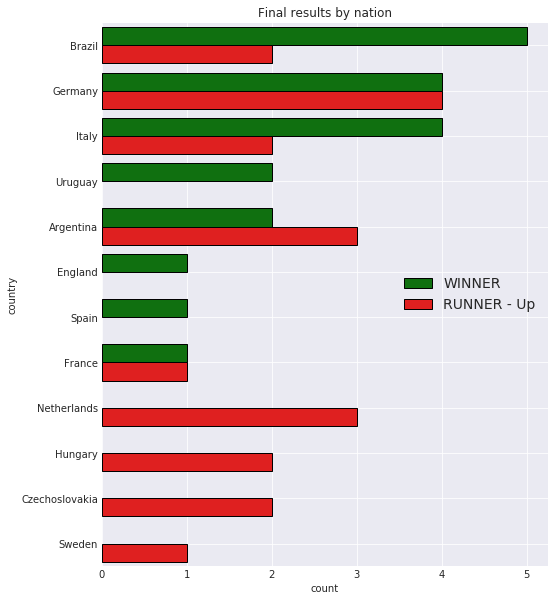

In [22]:
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,hue="type",palette=["g","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation")
plt.show()

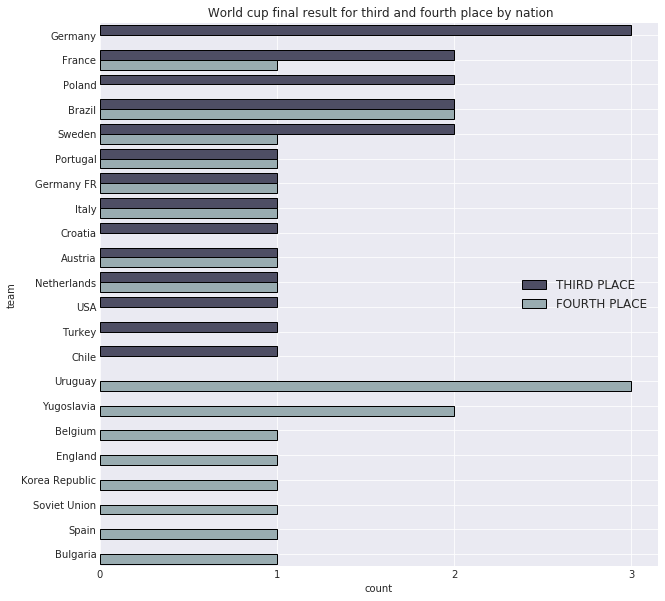

In [23]:
thrd = cups["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = cups["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = "bone")
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation")
plt.legend(loc="center right",prop={"size":12})
plt.show()

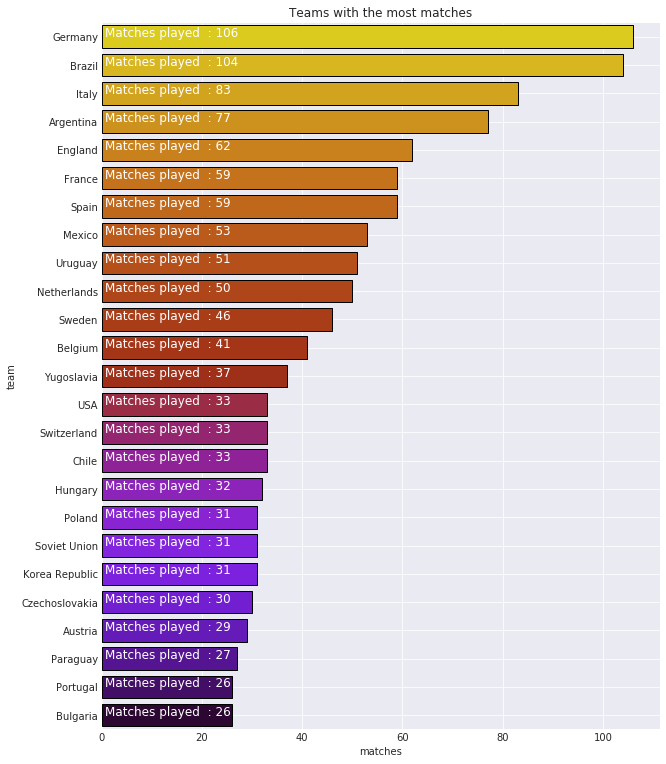

In [24]:
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")

ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches")
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

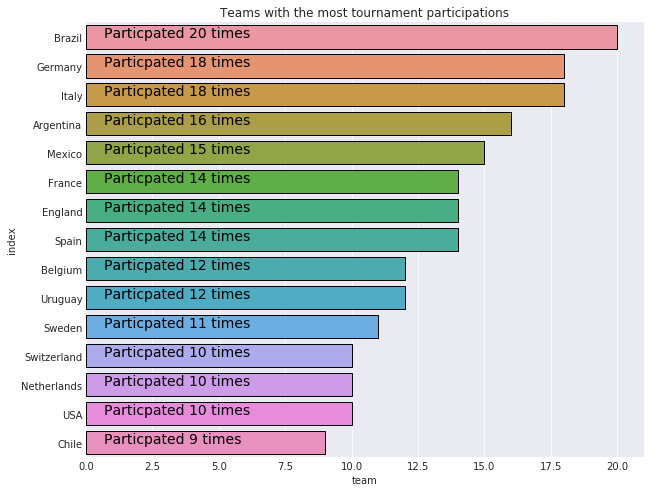

In [25]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
    
plt.title("Teams with the most tournament participations")
plt.show()

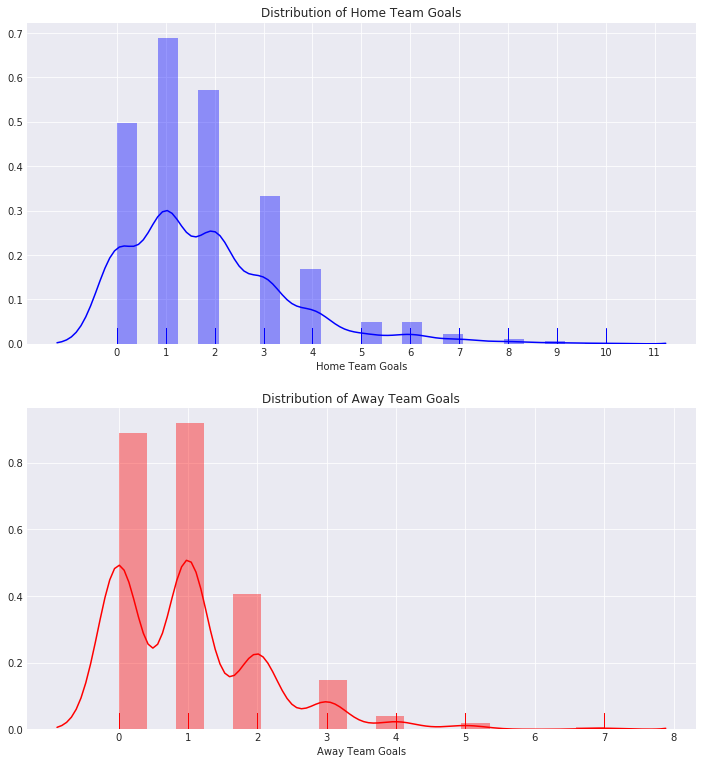

In [26]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals")


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals")
plt.show()

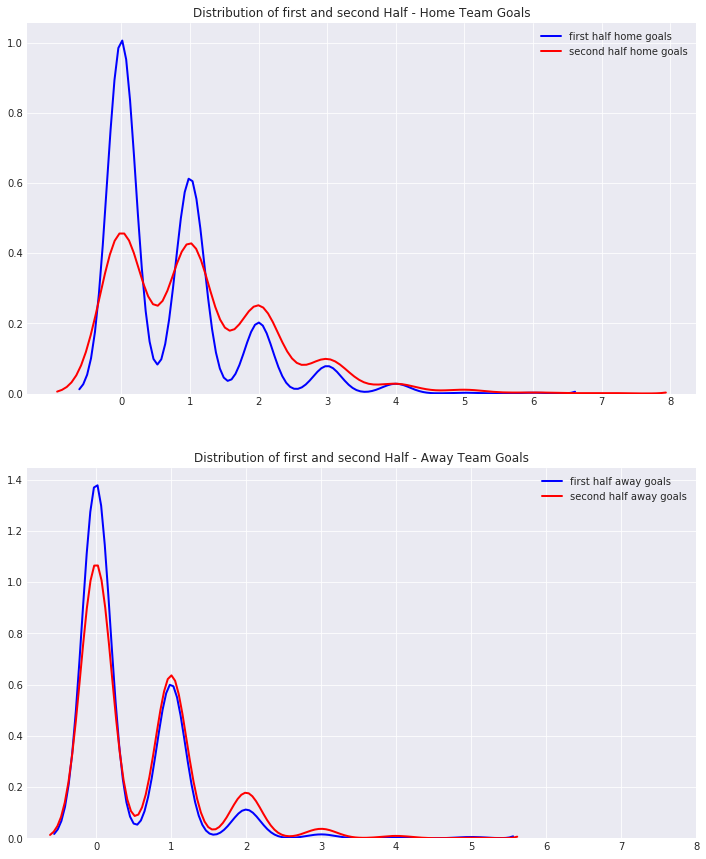

In [27]:
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})

matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches["first half home goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half home goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Home Team Goals")

plt.subplot(212)
sns.kdeplot(matches["first half away goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half away goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Away Team Goals")
plt.show()

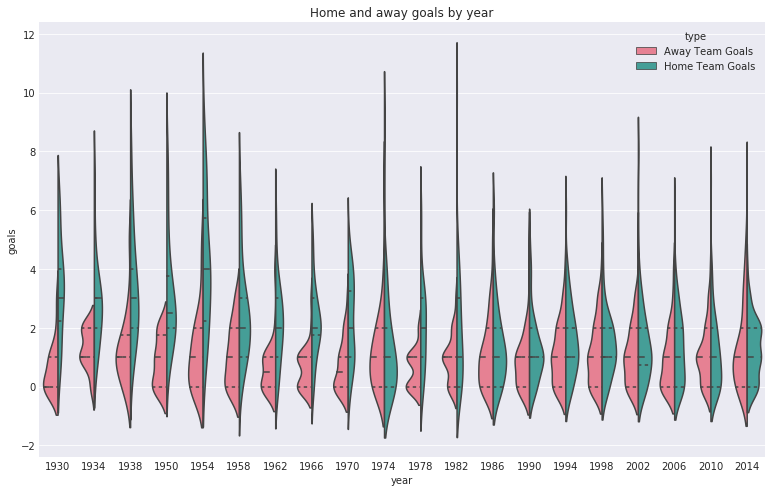

In [28]:
gh = matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

gls = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(gls["year"],gls["goals"],
               hue=gls["type"],split=True,inner="quart",palette="husl")

plt.title("Home and away goals by year")
plt.show()

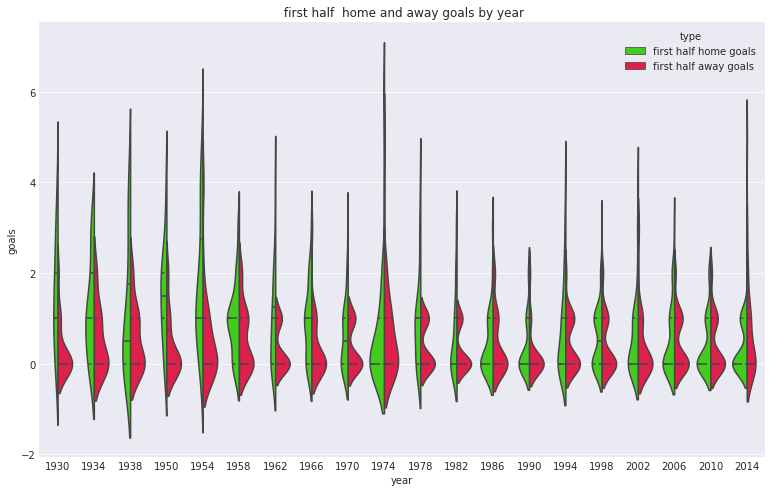

In [29]:
hhg = matches[["Year",'first half home goals']]
hhg.columns = ["year","goals"]
hhg["type"] = 'first half home goals'

hag = matches[["Year",'first half away goals']]
hag.columns = ["year","goals"]
hag["type"] = 'first half away goals'

h_time = pd.concat([hhg,hag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(h_time["year"],h_time["goals"],hue=h_time["type"],
               split=True,inner="quart",palette="prism")
plt.title(" first half  home and away goals by year")
plt.show()

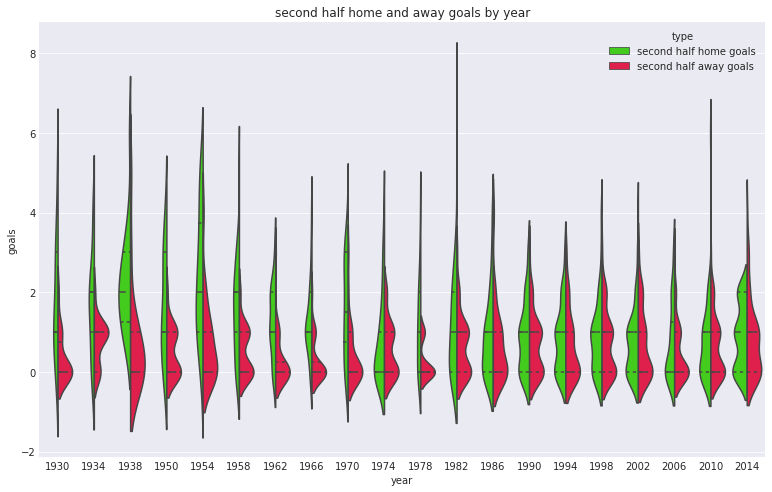

In [30]:
shg = matches[["Year",'second half home goals']]
shg.columns = ["year","goals"]
shg["type"] = 'second half home goals'

sag = matches[["Year",'second half away goals']]
sag.columns = ["year","goals"]
sag["type"] = 'second half away goals'

s_time = pd.concat([shg,sag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(s_time["year"],s_time["goals"],hue=s_time["type"],
               split=True,inner="quart",palette="prism")
plt.title("second half home and away goals by year")
plt.show()

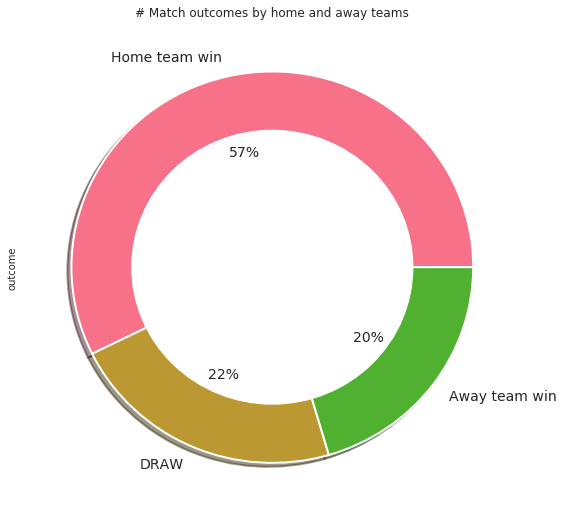

In [31]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams")
plt.show()

In [32]:
matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]


def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
matches["win_team"]  = matches.apply(lambda matches:win_label(matches),axis=1)
matches["lost_team"] = matches.apply(lambda matches:lst_label(matches),axis=1)
lst = matches["lost_team"].value_counts().reset_index()
win = matches["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

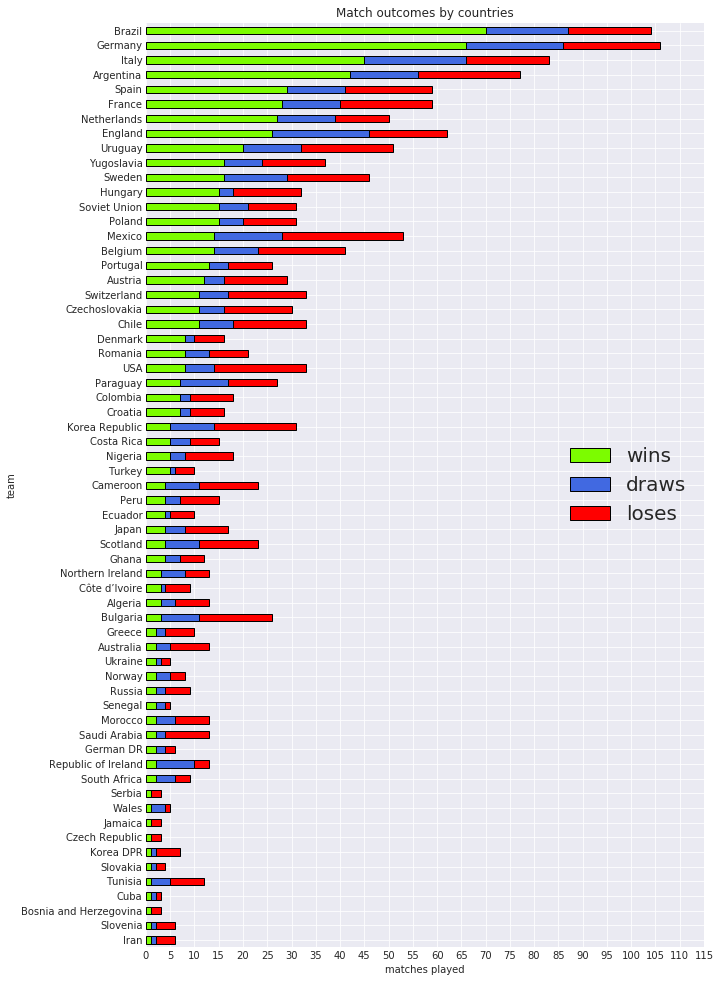

In [33]:
wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries")
plt.xlabel("matches played")
plt.show()

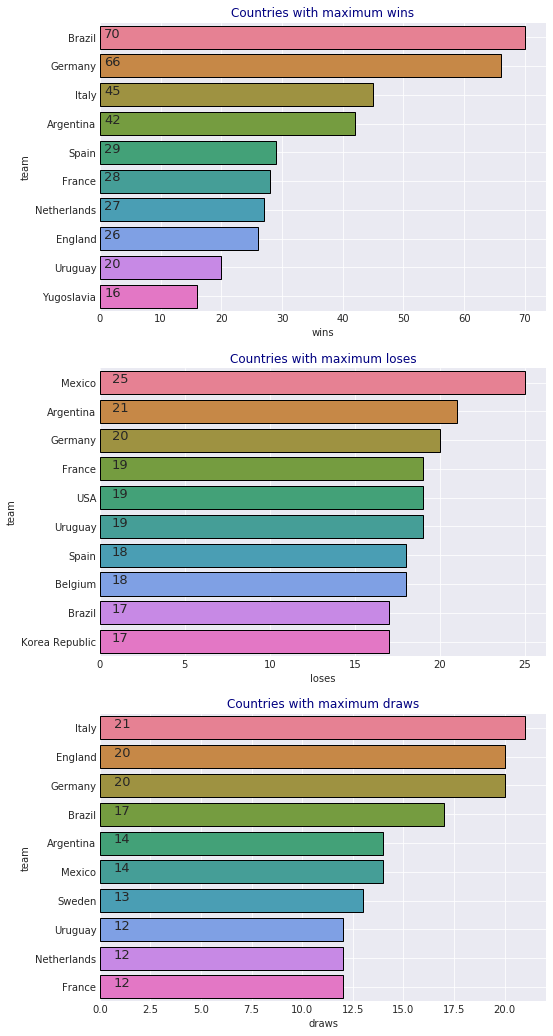

In [34]:
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(i,"team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k"*10,palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)
    
    plt.grid(True)
    plt.title("Countries with maximum "+i,color="navy")

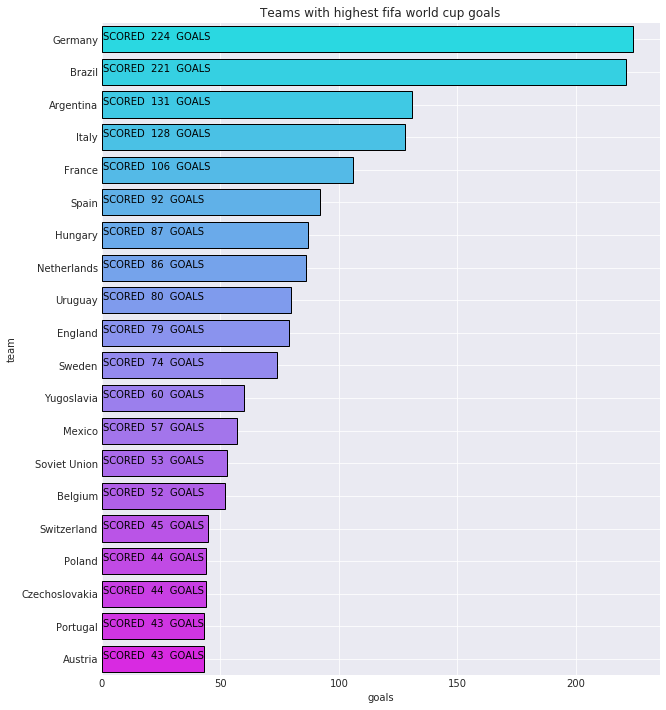

In [35]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals")
plt.grid(True)

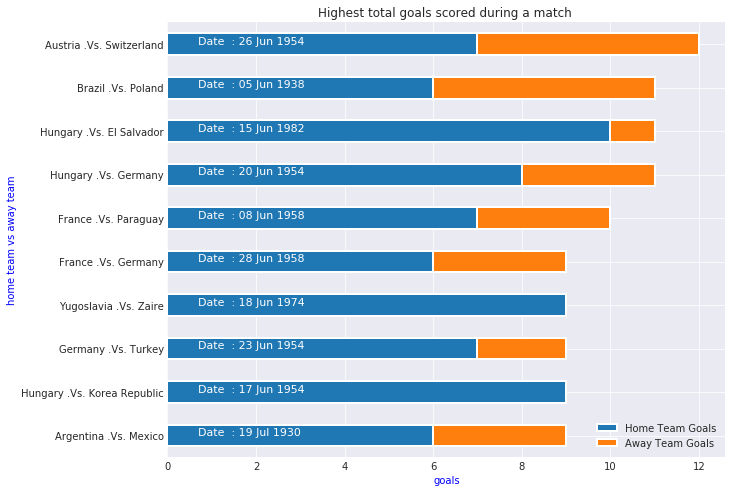

In [36]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:10][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,8),linewidth=2,
                                                       edgecolor="w"*10)

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ")

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()

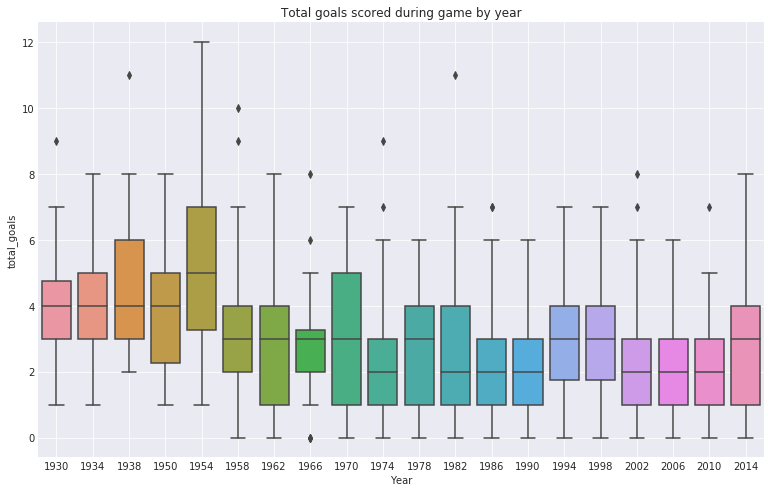

In [37]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["total_goals"],x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year")
plt.show()

In [38]:
#TEAM COMPARATOR
matches_played = mt.copy()
mat_new = matches_played.merge(lst,left_on="team",right_on="index",how="left")
mat_new = mat_new.merge(win,left_on="team",right_on="index",how="left")
mat_new = mat_new[["team","matches","lost_team","win_team"]]
mat_new = mat_new.fillna(0)
mat_new["win_team"] = mat_new["win_team"].astype(int)
mat_new["draws"]    = (mat_new["matches"]) - (mat_new["lost_team"] + mat_new["win_team"])
mat_new = mat_new.merge(total_goals,left_on="team",right_on="team",how="left")
mat_new = mat_new.rename(columns={"win_team":"wins","lost_team":"loses"})

def team_compare(team1,team2):
    
    lst = [team1,team2]
    dat = mat_new[mat_new["team"].isin(lst)]
    
    plt.figure(figsize=(12,8))
    cols   = ["matches","goals","wins","loses"]
    length = len(cols)
    
    for i,j in itertools.zip_longest(cols,range(length)):
        
        fig = plt.subplot(length/2,length/2,j+1)
        ax  = sns.barplot(dat[i],dat["team"],palette=["royalblue","r"],
                         linewidth=2,edgecolor="k"*len(lst))
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True,color="grey",alpha=.3)
        plt.title(i,color="navy",fontsize=15)
        plt.subplots_adjust(wspace = .3,hspace =.5)
        fig.set_facecolor("w")
        
        for k,l in enumerate(dat[i].values):
            ax.text(.7,k,l,weight = "bold",fontsize = 20)

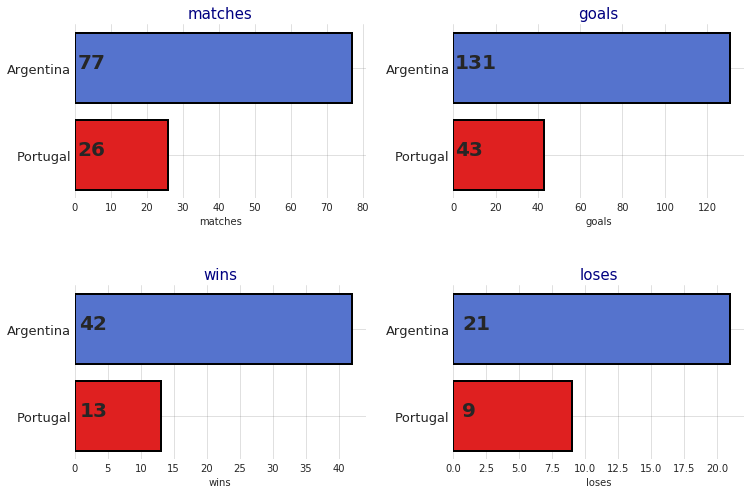

In [39]:
team_compare("Portugal","Argentina")

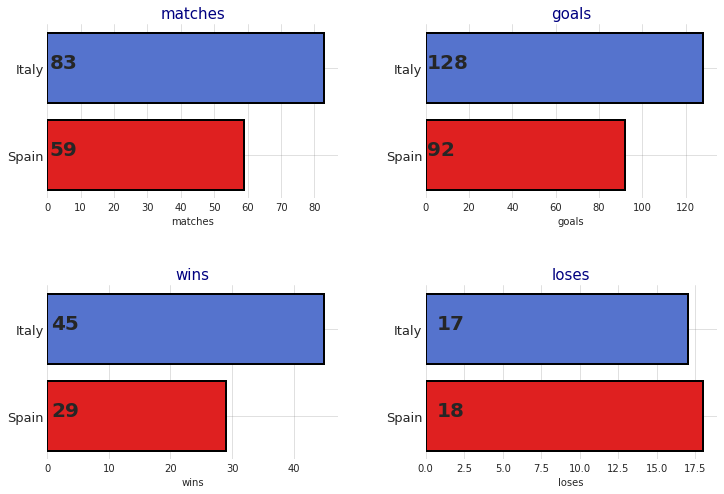

In [40]:
team_compare("Italy","Spain")

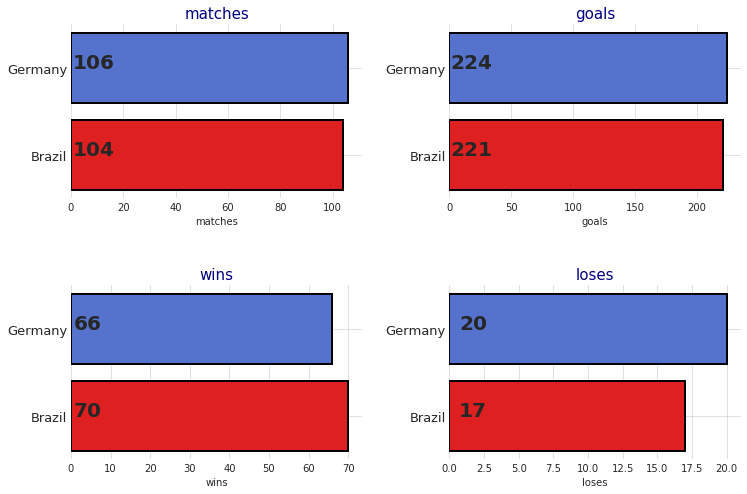

In [41]:
team_compare("Brazil","Germany")

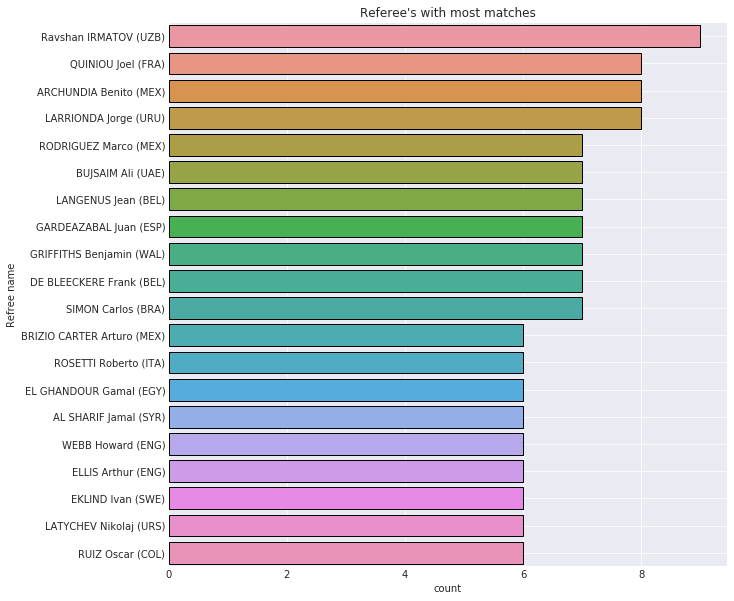

In [42]:
ref = matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)

plt.figure(figsize=(10,10))
sns.barplot("Referee","index",data=ref[:20],linewidth=1,edgecolor="k"*20)
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches")
plt.show()

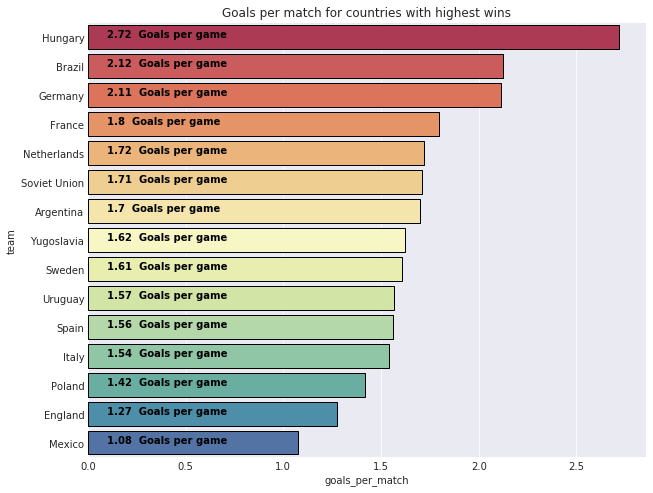

In [43]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["matches"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot("goals_per_match","team",
                 linewidth=1,
                 edgecolor=["k"]*len(cou_gpm),
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,color="k",weight = "bold")
    
plt.title("Goals per match for countries with highest wins")
plt.show()

In [44]:
import networkx as nx 

def interactions(year,color):
    
    df  =  matches[matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_dataframe(df,"Home Team Name","Away Team Name")
    
    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         edgecolor  = "k",
                         linewidths  = 5 ,
                         font_size  = 13 ,
                         alpha=.8)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "navy")

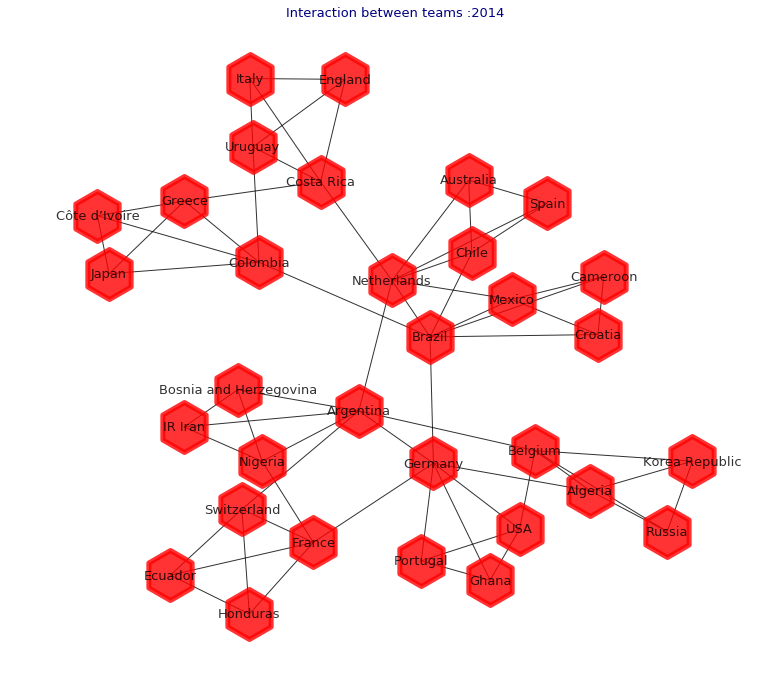

In [45]:
interactions(2014,"r")

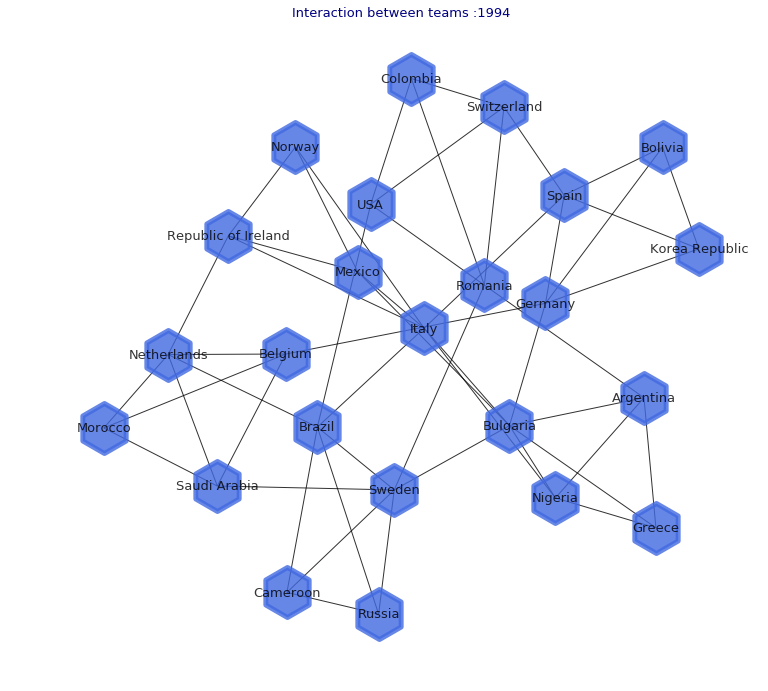

In [46]:
interactions(1994,"royalblue")

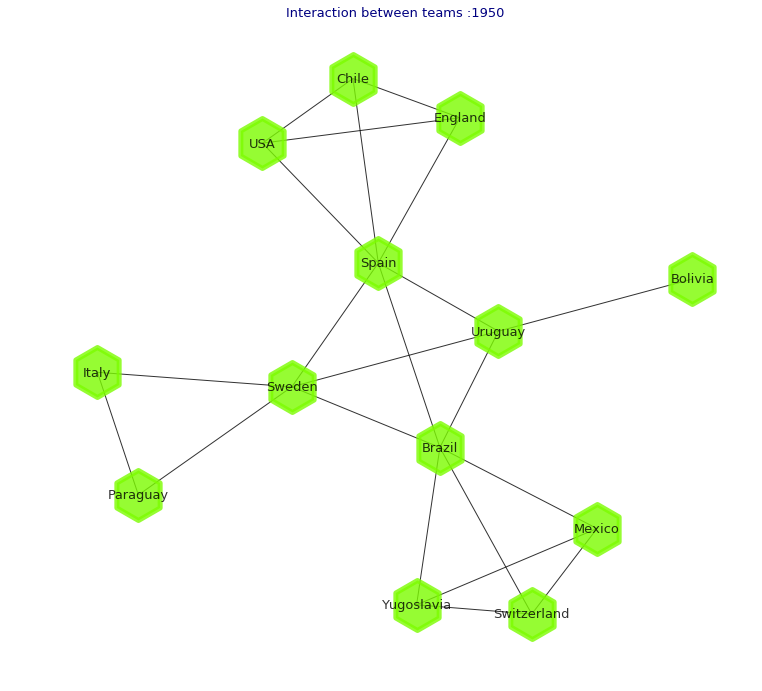

In [47]:
interactions(1950,"lawngreen")

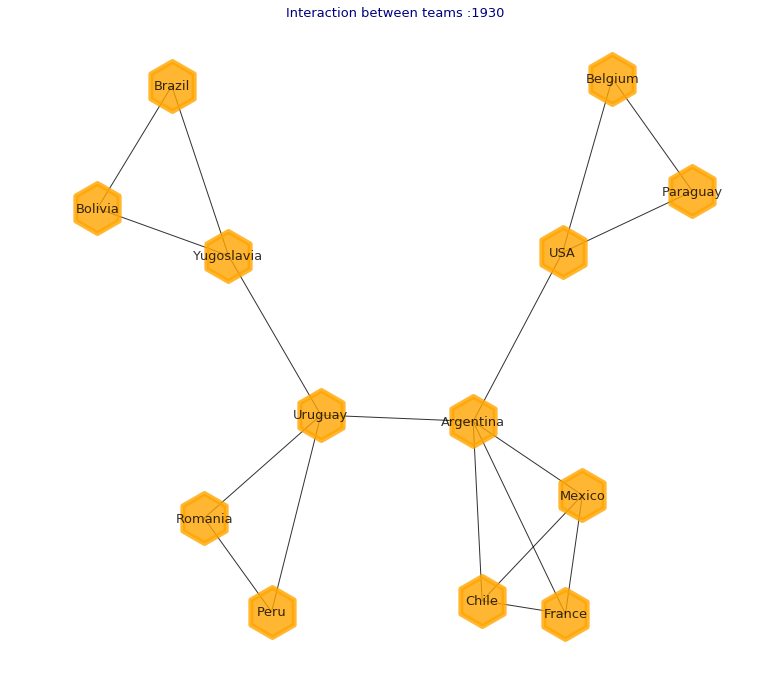

In [48]:
interactions(1930,"Orange")

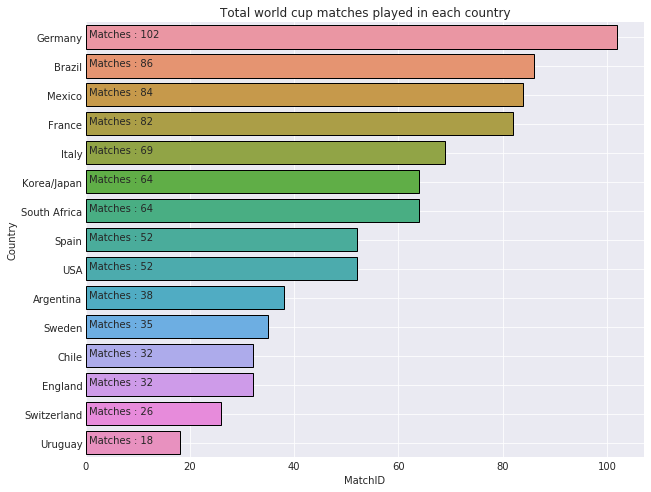

In [49]:
ysc = matches[["Year","Stadium","City","MatchID"]]
cy  = cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot("MatchID","Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k"*cnt_mat["Country"].nunique())

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country")
plt.grid(True)
plt.show()

In [50]:
ysc["Country_yr"] = ysc["Country"] + " - " + ysc["Year"].astype(str)


def stadium_country(country,color):
    
    dat2 = ysc[ysc["Country"] == country]
    
    plt.figure(figsize=(10,8))

    H = nx.from_pandas_dataframe(dat2,"Country","Stadium")

    nx.draw_kamada_kawai(H,
                         with_labels=True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "s",
                         edgecolor  = "k",
                         linewidths  = 7 ,
                         font_size  = 13 ,
                         alpha=.8,
                         weight = "bold")

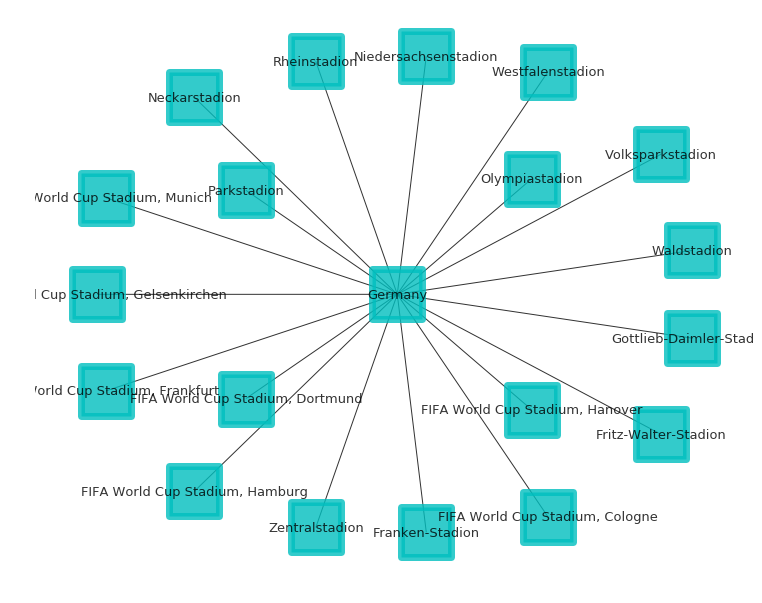

In [51]:
stadium_country("Germany","c")

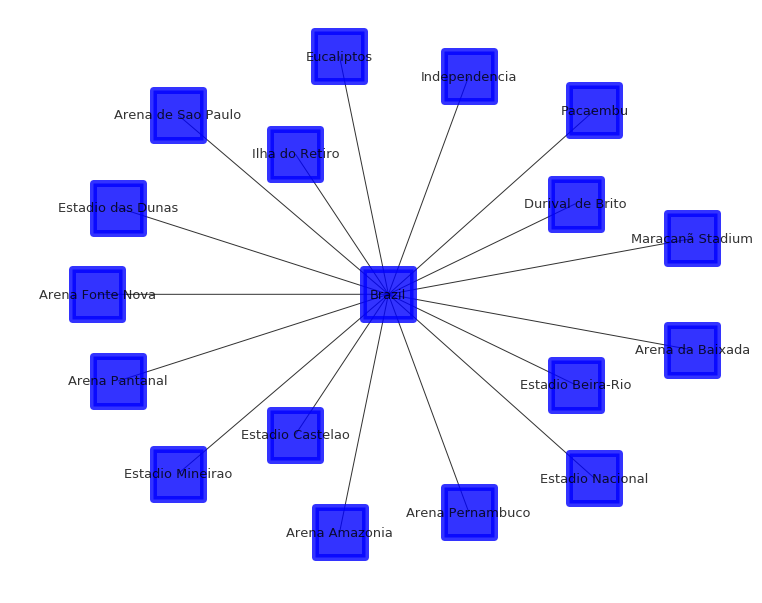

In [52]:
stadium_country("Brazil","b")

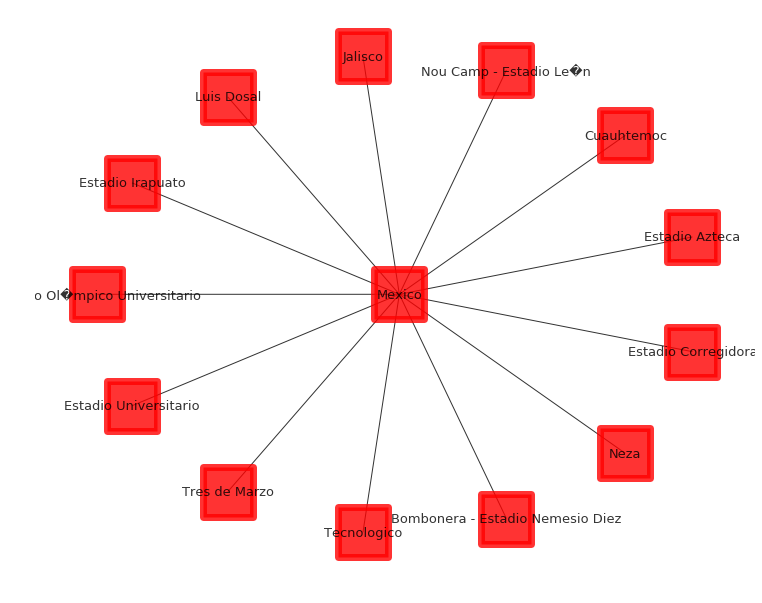

In [53]:
stadium_country("Mexico","r")

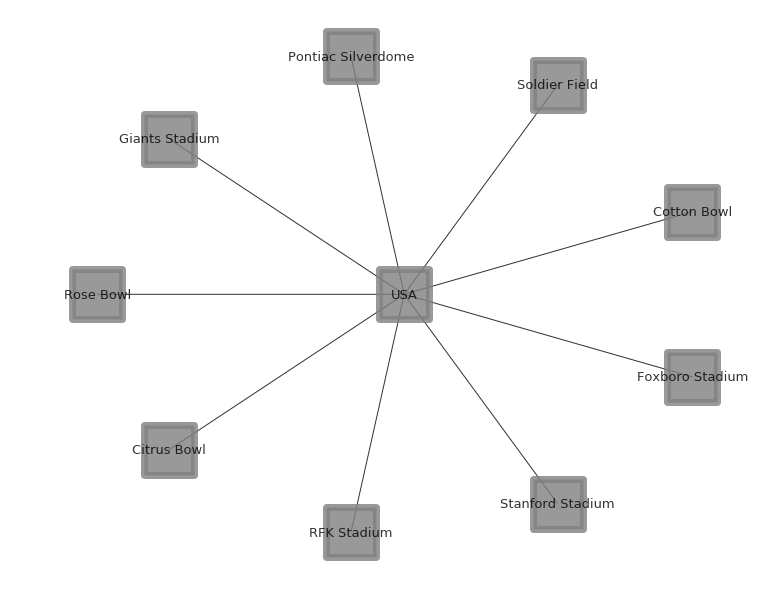

In [54]:
stadium_country("USA","grey")

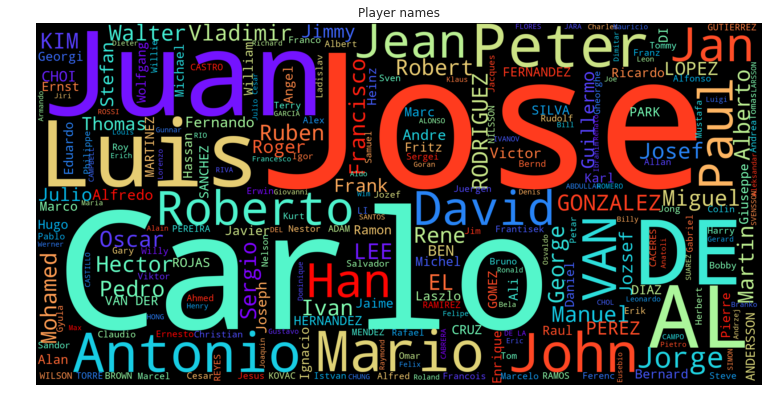

In [55]:
wrds = players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names")
plt.show()

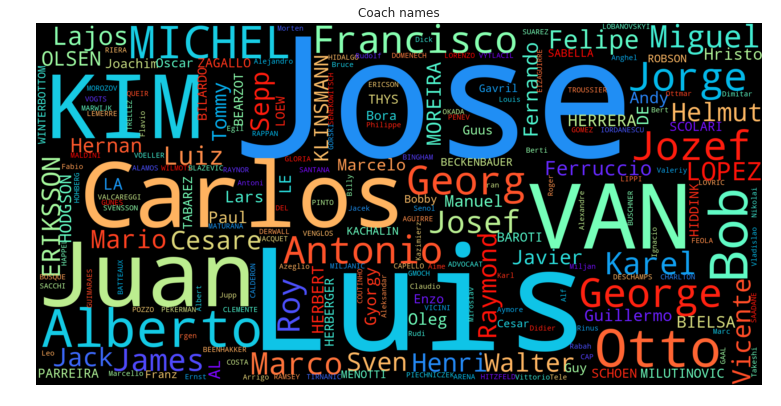

In [56]:
wrds1 = players["Coach Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(13,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Coach names")
plt.show()

In [57]:
win_conditions = matches[matches["Win conditions"] != " "]
extra_time    = win_conditions[win_conditions["Win conditions"].str.contains("extra time")]
penalties     = win_conditions[win_conditions["Win conditions"].str.contains("penalties")]

gold_goal     = win_conditions[win_conditions["Win conditions"].str.contains("Golden Goal")]
gold_goal.index  = gold_goal["MatchID"].astype(int)

gg= gold_goal[["Datetime","Stage","Home Team Name",
              "Away Team Name","Home Team Goals",
              "Away Team Goals","first half home goals",
              "second half home goals","win_team","Win conditions"]].transpose()
gg.style.set_properties(**{"background-color":"black",
                           "color" : "white",
                           "border-color" : "lawngreen"}).set_caption("Matches with Golden Goals")

MatchID,43950051,43950056,43950060
Datetime,16 Jun 2002,18 Jun 2002,22 Jun 2002
Stage,Round of 16,Round of 16,Quarter-finals
Home Team Name,Sweden,Korea Republic,Senegal
Away Team Name,Senegal,Italy,Turkey
Home Team Goals,1,2,0
Away Team Goals,2,1,1
first half home goals,0,0,0
second half home goals,1,2,0
win_team,Senegal,Korea Republic,Turkey
Win conditions,Win on Golden Goal,Win on Golden Goal,Win on Golden Goal
